In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.load('np/fe_X.npy')

In [3]:
y = np.load('y.npy')

### Visualizing class distribution

In [4]:
exited = sum(y)

In [5]:
retained = 10000 - exited

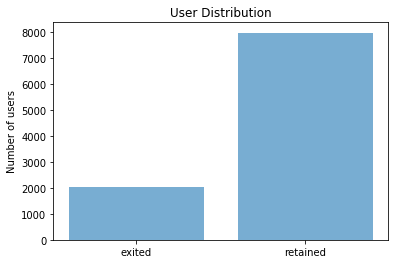

In [6]:
plt.figure()
plt.bar(['exited', 'retained'], [exited, retained], align='center', alpha = 0.6)
plt.ylabel('Number of users')
plt.title('User Distribution')
plt.show()

Creating test and train sets as we it will be foolish to test results on synthetic samples

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### The class distribution is highly imbalanced

SMOTE (Synthetic Minority Oversampling Technique) is used here
It works as follows:
1. Identify a data point and its nearest neighbour
2. Take their difference
3. Multiply this difference by a random number between 0 and 1
4. Identify a new point on this line segment by adding the random number to the data point choosen
5. Repeat the process

In [9]:
from imblearn.over_sampling import SMOTE

In [10]:
sm = SMOTE(random_state=42)

In [11]:
X_res, y_res = sm.fit_sample(X_train, y_train)

In [12]:
X_res.shape

(12712, 17)

In [13]:
y_res.shape

(12712,)

In [14]:
from collections import Counter
print('Resampled dataset shape {}'.format(Counter(y_res)))

Resampled dataset shape Counter({0: 6356, 1: 6356})


In [15]:
np.save('np/SMOTE_X_train.npy',X_res)
np.save('np/SMOTE_y_train.npy',y_res)

np.save('np/X_test.npy',X_test)
np.save('np/y_test.npy',y_test)

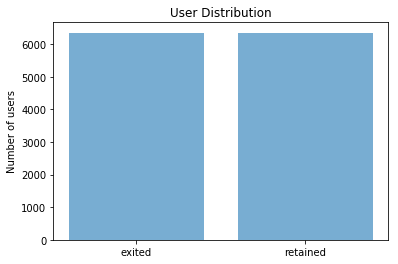

In [16]:
plt.figure()
plt.bar(['exited', 'retained'], [sum(y_res), len(y_res)-sum(y_res)], align='center', alpha = 0.6)
plt.ylabel('Number of users')
plt.title('User Distribution')
plt.show()

Classes are now balanced